# Advanced Statistics for Physics Analysis
## R Lab 02

### Student: Toso Simone (2095484)

In [2]:
library(tidyverse)

### Ex.1 - Discrete random variable
#### The probability distribution of a given variable is $\frac{k}{15}$ if $k\in\{1,2,3,4,5\}$, $0$ otherwise.
 #### - write the R probability functions for the probability density and cumulative distribution functions, following the R naming convention

In [3]:
#pdf --> return k/15 or 0
dFunc <- function(x){
    if(x>=1 && x<=5){
        return(x/15)
    }
    else{
        return(0)
    }
}

dFunc <- Vectorize(dFunc) #Vectorize it for future use


#CDF(x) = \sum_{x_i <= x} p(x_i)
pFunc <- function(x){
    out = 0
    #Sum all probabilities for 1,2,...,x
    for(i in 0:min(floor(x),5)){
        out <- out+dFunc(i)
    }
    return(out)
}
pFunc <- Vectorize(pFunc)

#### - Produce two plots of the pdf and cdf respectively 

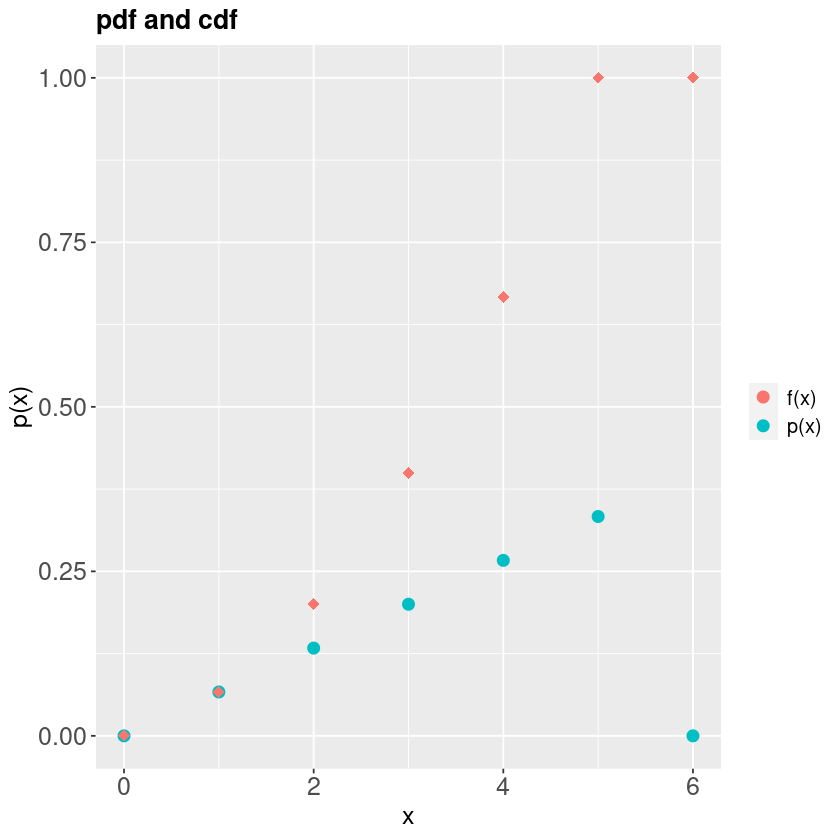

In [39]:
xs <- 0:6
ds <- dFunc(xs)
ps <- pFunc(xs)

plot_data <- data.frame(xs,ds,ps)

p <- ggplot(data = plot_data, aes(x=xs)) + geom_point(aes(y = ds,color = "p(x)"), size = 3) + geom_point(aes(y = ps,color = "f(x)"), size = 3, shape = "diamond") + ggtitle("pdf and cdf") 
theme <- theme(legend.text = element_text(size = 12), axis.title = element_text(size = 15), axis.text = element_text(size = 15), plot.title = element_text(face = "bold", size = 16))
print(p+theme + labs(x = "x", y = "p(x)", color = NULL))

#### Compute, using R, the mean value and variance of the probability distribution

In [5]:
#Sum_i p(i)i
mean = xs%*%ds #computed as dot product

#Sum_i p(i)(x_i-mean)**2
var = ds%*%(xs-rep(mean,length(xs)))**2

In [6]:
mean

3.666667


In [7]:
var

1.555556


#### Compute, using R, the expected value E [k (6 − k)]

In [8]:
ds%*%(xs*(rep(6,length(xs))-xs))

7


#### Write the R function that allows to sample random numbers from the probability distribution

In [9]:
rFunc <- function(N){
    output <- list()
    for(i in 1:N){
        r <- runif(1)
        output[[i]] <- xs[pFunc(xs) > r][1]
    }
    return(unlist(output))
}

#### Using the implemented function, sample $10^5$ random numbers from this distribution and plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize properly the plots with random numbers)

In [10]:
samples <- rFunc(100000)

In [11]:
df = as.data.frame(samples)

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


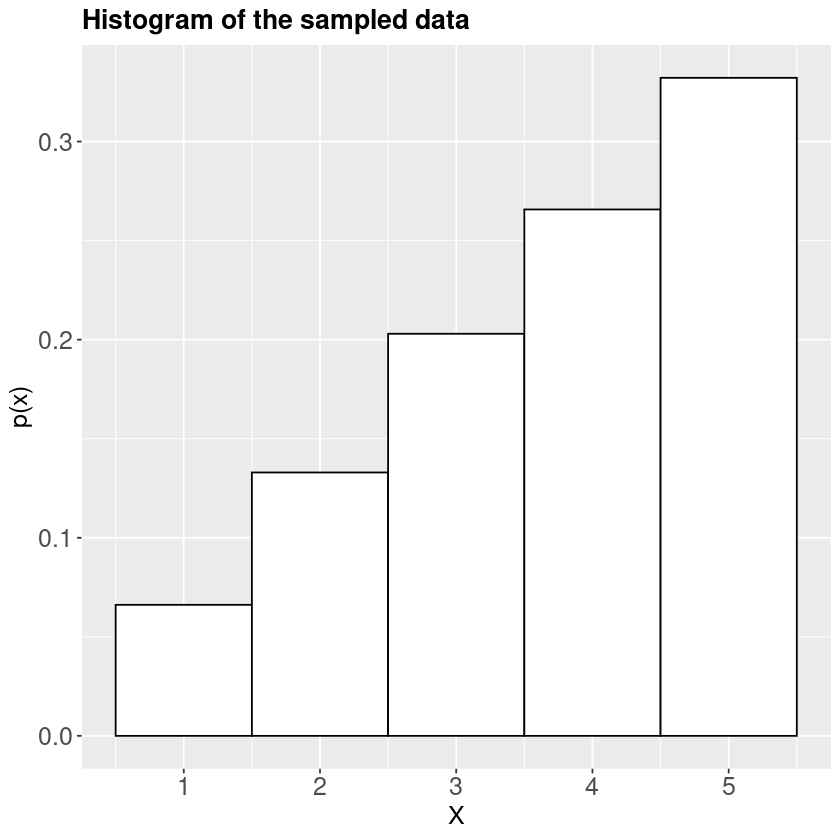

In [12]:
plot <- ggplot(df, aes(x = samples)) + geom_histogram(aes(y=..count../sum(..count..)),bins = 5, colour="black", fill="white") 
labels <- labs(x = "X", y = "p(x)")
print(plot + labels + theme + ggtitle("Histogram of the sampled data"))

### Exercise 2 - Continuous random variable
The triangular distribution, in the interval (a, b), is given by the following: 2(x − a)
(b − a)(c − a) a ≤ x < c
2(b − x)
(b − a)(b − c) c ≤ x ≤ b
0 otherwise
where c ∈ [a, b].
#### a) plot the function, given the interval (a, b)

In [13]:
a <- 5
b <- 10
c <- 7

xs <- seq(from = 5, to = 10, length.out = 1000)
f <- function(x){
    if(a <= x && x < c){
        return(2*(x-a)/((b-a)*(c-a)))
    }
    else if(c <= x && x <= b){
        return(2*(b-x)/((b-a)*(b-c)))
    }
    else
        {
        return(0)
    }
}

f <- Vectorize(f)

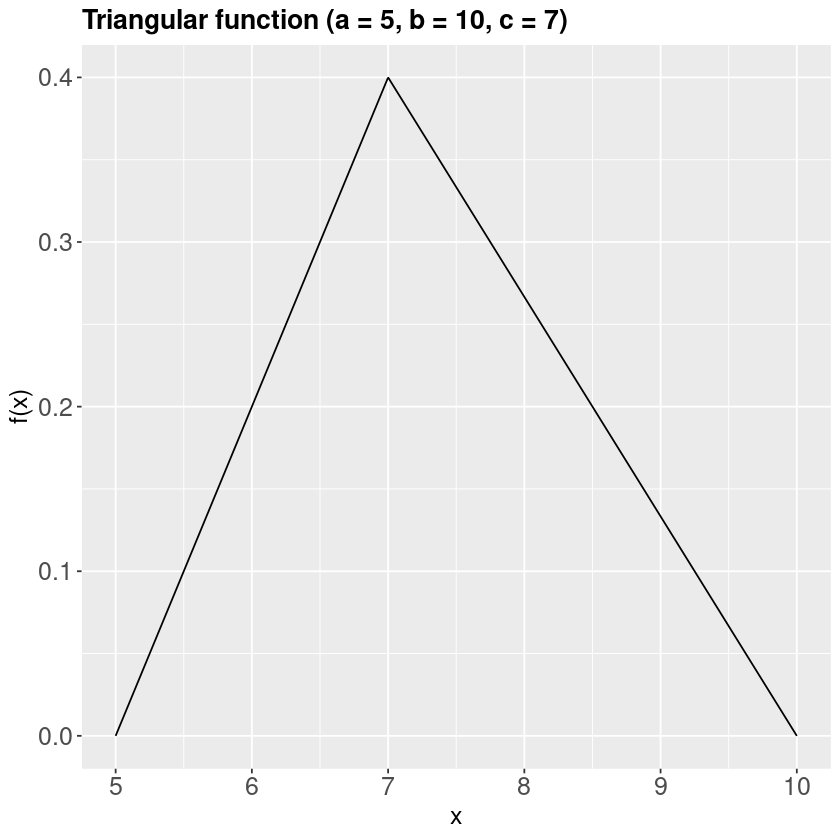

In [14]:
fs <- f(xs)
data <- data.frame(xs,fs)
ggplot(data = data, aes(x = xs, y = fs)) + geom_line() + theme + labs(x = "x", y = "f(x)") + ggtitle("Triangular function (a = 5, b = 10, c = 7)")

#### b) Write an algorithm to generate random numbers from the triangular distribution

Integrating the analytical expression of the triangular distribution we get that the cumulative function is
$F(x) = \frac{(x-a)^2}{(b-a)(c-a)}$ if $a \leq x\leq c$ and $F(x) = \frac{(c-a)}{(b-a)}-\frac{(b-x)^2}{(b-a)(b-c)} + \frac{(b-c)}{(b-a)}$ if $ c < x \leq b$. By inverting these expression we can use inverse sampling.

In [15]:
#Inverse sampling. 

rTriangular <- function(N){
    output <- list()
    for(i in 1:N){
        u <- runif(1)
        x <- ifelse(u <= (c-a)/(b-a), sqrt(u*(b-a)*(c-a))+a, b-sqrt((c-a)*(b-c)+(b-c)**2-u*(b-a)*(b-c)) )
        output[[i]] <- x
    }
    return(unlist(output))
}

#### Generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

In [16]:
samples <- rTriangular(10000)
dataSamples <- data.frame(samples)

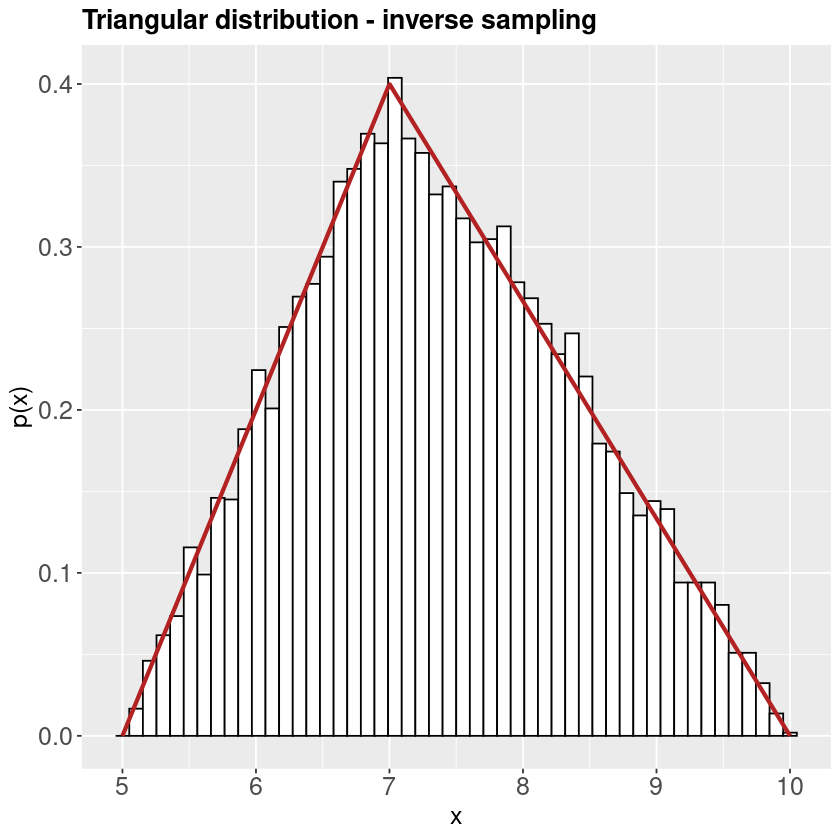

In [17]:
plot <- ggplot(data = dataSamples, aes(x=samples)) + geom_histogram(aes(y =..density..), bins = 50, colour="black", fill="white")
labels <- labs(x = "x", y = "p(x)")
title <- ggtitle("Triangular distribution - inverse sampling")
plot <- plot + labels + title
print(plot+geom_line(data = data, aes(x = xs, y = fs), color = "firebrick", linewidth = 1.2)+theme)

### Ex.3 
The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an
exponential pdf with rate 1/30
#### a)  Simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram

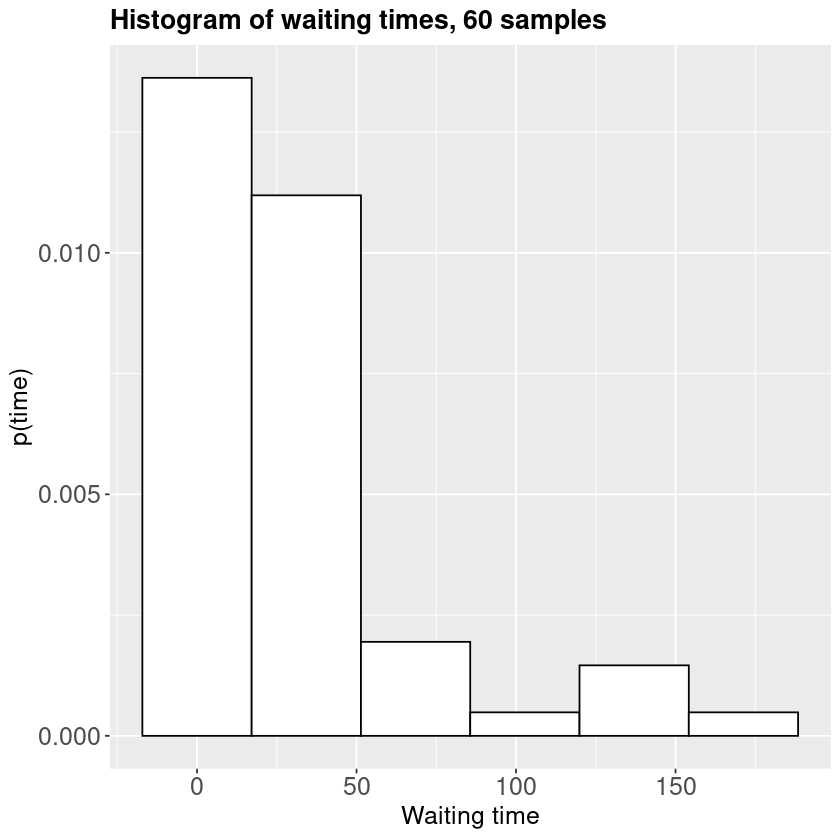

In [32]:
lambda <- 1/30
data <- as_tibble(data.frame(times = rexp(60, rate=lambda)))
ggplot() + geom_histogram(data = data, aes(x = times, y = ..density..), bins = 6, colour = "black", fill = "white") + theme + labs(x = "Waiting time", y = "p(time)") + ggtitle("Histogram of waiting times, 60 samples")

#### b) What is the probability that a person will wait for less than 12 minutes ?

#### With R simulation:

In [33]:
probLess12 <- length(data[data$times<12,]$times)/length(data$times)
probLess12

[1] 0.3666667

#### Theoretical answer:
$p(t<12) = \int_{0}^{12}\lambda e^{-\lambda x}dx = \left[-e^{-\lambda x}\right]^{12}_0 = 1-e^{-\lambda\cdot 12} = 1-e^{-\frac{12}{30}} \approx 0.33$

In [34]:
1-exp(-12/30)

[1] 0.32968

If we had sampled more points, the observed fraction of waiting times would tend to the theoretical one. 
For example:

In [35]:
dataMore <- as_tibble(data.frame(times = rexp(60000, rate=lambda)))
probLess12_moreData <- length(dataMore[dataMore$times<12,]$times)/length(dataMore$times)
probLess12_moreData

[1] 0.3305667

#### c) Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [36]:
#Simulated average
mean_samples <- mean(data$times)

#Mean value through numerical integration of the pdf
mean_int <- integrate(function(x){x * dexp(x,rate = lambda)},lower = 0, upper=Inf)

#Theoretical mean value is 1/lambda = 30 minutes

(mean_samples)
(mean_int)
(1/lambda)

[1] 29.46035

30 with absolute error < 2.5e-05

[1] 30

The theoretical expectation value is $30$ minutes. Through numerical integration of the pdf we get the same result. 
The average on the dataset is 33.4 minutes. If we had more data, the computed average would be closer to the theoretical one, as shown below:

In [37]:
mean(dataMore$times)

[1] 29.89352

#### d) What is the probability of waiting more than one hour before being received?

From theory: 
$p(t > 60\text{ min}) = \int_{60}^{+\infty}\lambda e^{-\lambda x} dx = \left[-e^{-\lambda x}\right]^{+\infty}_{60} = e^{-\frac{60}{30}} = e^{-2} \approx 0.135 $.

From R simulation:

In [38]:
pMoreHour <- length(data[data$times > 60,]$times)/length(data$times)
pMoreHour

[1] 0.1333333

### Ex 4 - Multiple choices exams
The final exam of a course is given to the students in the format of a multiple choice written test:
for each questions there are five possible alternatives.

- A student either knows the answer, or selects randomly the answer among the five possible choices
- Assuming p = 0.7 the probability that the student knows the answer, once a correct answer is given, what is the probability that the student really knew the correct answer ?
    
- Write a small R program to provide the answer

#### Theoretical answer:
We can use Bayes' Theorem to figure it out. We have $p(knew|correct) = \frac{p(correct|knew)p(knew)}{p(correct|knew)p(knew)+p(correct|\neg knew)p(\neg knew)} = \frac{1\cdot0.7}{1\cdot0.7+0.2\cdot0.3} = \frac{0.7}{0.76} \approx 0.92$

In [26]:
0.7/0.76

[1] 0.9210526

#### R simulation:

In [27]:
#Simulate the result of one question for N students (with N >> 1). 

N <- 500000
knew <- sample(c(TRUE,FALSE), N, replace = TRUE, prob = c(0.7,0.3)) #Did each student know?
correct <- list()
for(i in 1:N){
    correct[[i]] <- ifelse(knew[i], TRUE, sample(c(TRUE,FALSE), size = 1, prob = c(0.2,0.8))) # Got answer right?
} 
correct <- unlist(correct)
nCorrect <- sum(correct) #How many got it right?
nKnewCorrect <- sum(correct[knew]) #How many got it right and knew?
pKnewCorrect <- nKnewCorrect/nCorrect #p(knew|correct)
pKnewCorrect

[1] 0.9211217

### Exercise 5 - Waiting time
Starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma
Termini. We assume there is always an available seat on a train leaving from Milano

Assuming a person arrives at a random time between 10:45 and 11:45 and compute the probability
that she has to wait

a) at most 10 minutes

b) at least 15 minutes

c) what is the average time spent waiting ?

#### R simulation:

In [28]:
#Let's compute waiting times for N >> 1 passengers and evaluate desired quantities
N <- 100000
trains <- c(11,11.5,12) #working with fractions of hours
waitingTimes <- list()
for(i in 1:N){
    arrival <- runif(1, 10.75,11.75)
    waitingTime <- abs(arrival - min(trains[trains > arrival]))#time to first train available
    waitingTimes[[i]] <- waitingTime
}
waitingTimes <- unlist(waitingTimes)

pMost10 <- length(waitingTimes[waitingTimes < 1/6])/length(waitingTimes)
print(paste("Probability of waiting at most 10 minutes: ", pMost10))

pLeast15 <- length(waitingTimes[waitingTimes > 1/4])/length(waitingTimes)
print(paste("Probability of waiting at least 15 minutes: ", pLeast15))

average <- mean(waitingTimes)*60 #in minutes
print(paste("Average waiting time in minutes: ", average))

[1] "Probability of waiting at most 10 minutes:  0.33302"
[1] "Probability of waiting at least 15 minutes:  0.49885"
[1] "Average waiting time in minutes:  15.0053107186463"


### Exercise 6 - stock investment
 - The annual return rate for a specific stock on the market is a normal variable with a 10% mean and a 12% standard deviation
 - Mr X decides to buy 200 shares of that specific stock at a price of 85 euros per share
 - What is the probability that after a year his net profit from the investment is at least 800 euro ?
 
 (suppose there are no transaction costs and that there are no annual dividend for the stock)

In [29]:
initialExpense <- 85*200
desiredGain <- 800
desiredGainFraction <- desiredGain/initialExpense

#p(return >= desiredGainFraction) = 1 - p(return < desiredGainFraction) = 1 - cumulativeOfNormalDistribution()
probability <- 1 - pnorm(desiredGainFraction, 0.1, 0.12)
print(paste("Probability of gaining 800 euros: ",probability))

[1] "Probability of gaining 800 euros:  0.670457377028878"


We could also evaluate it with a simulation

In [30]:
#Evaluate for N >> 1 investors
N <- 100000
initialExpense <- 85*200
desiredMoney <- 85*200+800
successes <- 0
for(i in 1:N){
    rate <- rnorm(1, mean = 0.1, sd = 0.12)
    if(initialExpense*(1+rate) > (desiredMoney)){
        successes <- successes + 1
    }
}

print(paste("Probability of gaining 800 euros", successes/N))

[1] "Probability of gaining 800 euros 0.67005"
